In [1]:
import numpy as np
import matplotlib.pyplot as plt

## CONSTANTS
N = 27 # id number

f = abs(int(1000 * np.sin( (2 * np.pi / 49) * N))) # Frequency
phi = 2 * np.pi / N # Phase
A = 1 # amplitude


num_components = 1000  # 1000 component waves
sample_rate = 1000 # sample rate
time_interval = 5 * 1/f # second
time = np.linspace(0, time_interval, sample_rate)  # 3 period

print(
    f'\n Amplitude: {A}',
    f'\n Frequency: {f}',
    f'\n Init Phase: {phi}',
)



 Amplitude: 1 
 Frequency: 315 
 Init Phase: 0.23271056693257727


# Assignment 1

### 1. Square wave


 SQUARE WAVE

Amplitude with 1000 components: 1.0003183086253513


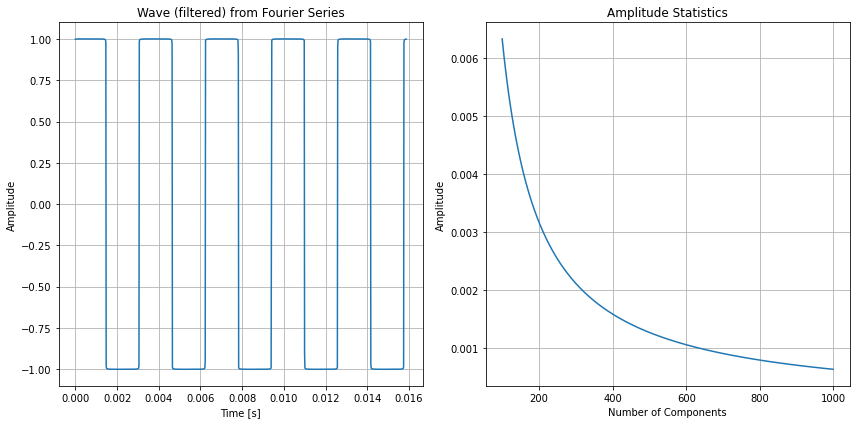

In [2]:
def square_wave(A=A, time=time, f=f, phi=phi, num_components=1000):
    wave = 4/np.pi * A * sum(
                            1/n * np.sin((2*np.pi*f) * n *  time + phi * n)
                            for n in range(1, 2*num_components+1, 2)
                        )
    amp = [4 * A / (np.pi * n) for n in range(1, 2*num_components+1, 2)]
    return wave, amp

def plot_and_stats(in_func, amplitude=A) -> None:
    """
    Plot input function, find amplitude and survey amplitude wave 
    as changing num_components
    params:
        in_func: input function,
        amplitude: amplitude 
    return: None
    """

    wave1k, amps = in_func(A=amplitude)

    def find_amplitude(wave):
        return np.max(wave)

    print(f'\nAmplitude with 1000 components: {find_amplitude(wave1k)}')

    # filter points at edge (outliers which value > amplitude)
    wave1k = np.clip(wave1k, -amplitude, amplitude)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot
    axes[0].plot(time, wave1k)
    axes[0].set_title('Wave (filtered) from Fourier Series')
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True)

    ##### amplitude STATS

    # Amplitude statistic of sum function as 
    # the number of components change for 100 to 1000?
    components = list(range(100, len(amps), 1))
    axes[1].plot(components, amps[100:len(amps)])
    axes[1].set_title('Amplitude Statistics')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('Amplitude')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

print('\n SQUARE WAVE')
plot_and_stats(square_wave, 1)

### 2. Triangle wave


Amplitude with 1000 components: 0.9990222800086472


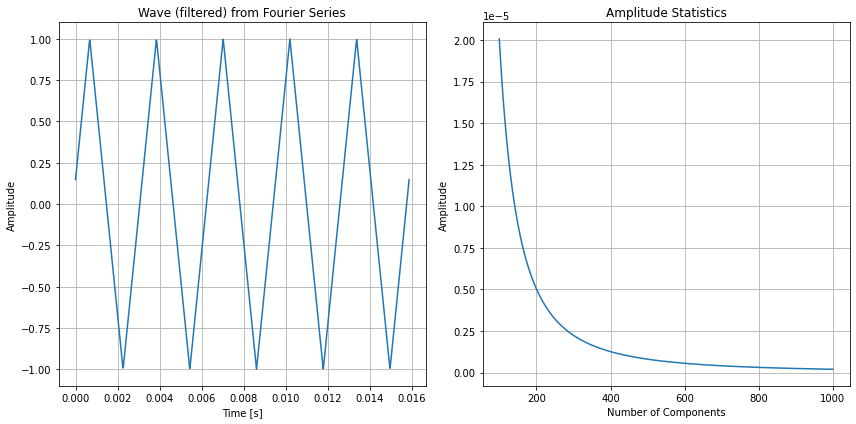

In [3]:
def triangle_wave(A=A, time=time, f=f, phi=phi, num_components=1000):
    wave = (8*A / np.pi**2) * sum(
                                (-1)**((k-1)//2)/ k**2  *
                                np.sin(2 * np.pi * k * f * time + k * phi) 
                                for k in range(1, 2*num_components+3, 2)
                                )
    amps = [8*A / (np.pi**2 * n**2) for n in range(1, 2*num_components+3, 2)]
    return wave, amps

plot_and_stats(triangle_wave, A)

### 3. Sawtooth wave


Amplitude with 1000 components: 1.1779765744719684


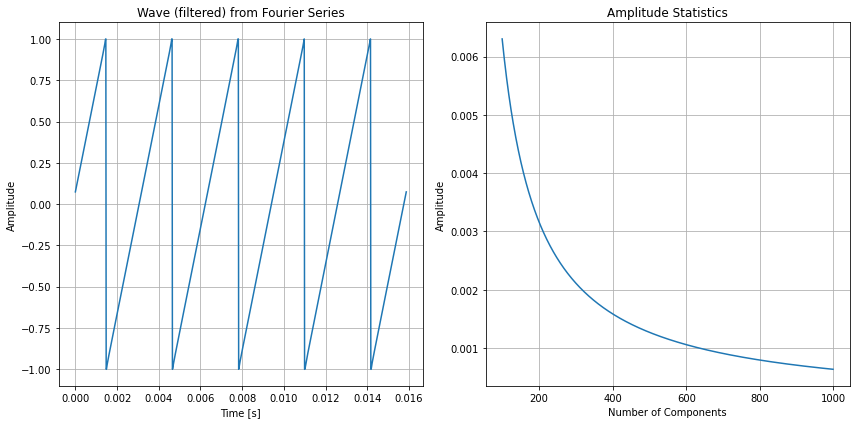

In [4]:
def sawtooth_wave(A=A, time=time, f=f, phi=phi, num_components=1000):
    wave = (2*A / np.pi) * sum(
                                ((-1)**(n+1) / n) *
                                np.sin(2 * np.pi * f * n * time + n * phi)
                                for n in range(1, num_components+1)
                            )
    amps = [2*A / (np.pi*n) for n in range(1, num_components+1) ]
    return wave, amps

plot_and_stats(sawtooth_wave, A)

### 4. Pulse train


Amplitude with 1000 components: 1.0003183086253513


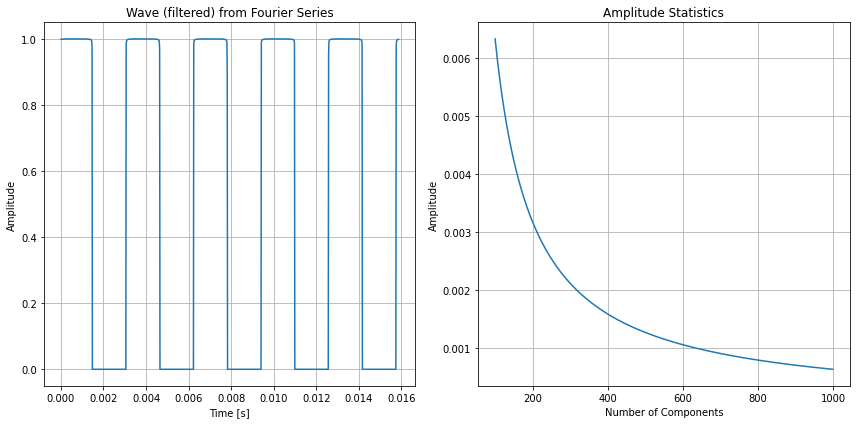

In [5]:
def pulse_train(A=A, time=time, f=f, phi=phi, num_components=1000):
    square_w = 4/np.pi * A * sum(
                            1/n * np.sin((2*np.pi*f) * n *  time + phi * n)
                            for n in range(1, 2*num_components+1, 2)
                        )
    max_a = np.max(square_w)
    pulse_train = np.clip(square_w, 0, max_a) # square wave with non-negative is a form of pulse train
    amps = [4 * A / (np.pi * n) for n in range(1, 2*num_components+1, 2)]
    return pulse_train, amps

plot_and_stats(pulse_train, A)

# Assignment 2

### 2.1

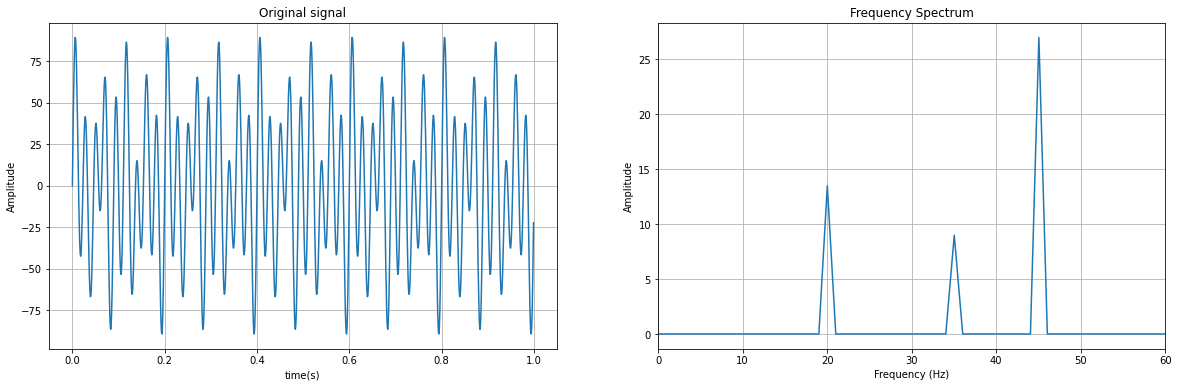

In [6]:
# t = time
t = [i / 1000 for i in range(1000)]  # 1000 points from 0 to 1 second
# our signal: y= N\sin(2\pi20t) + 2/3N\sin(2\pi35t)+2N\sin(2\pi45t)
y = [N * np.sin(2*np.pi * 20*t_step) + 2/3*N * np.sin(2*np.pi * 35*t_step) + 2*N * np.sin(2*np.pi * 45*t_step) for t_step in t]

# DFT transform function
def _dft(signal):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal signal
    """
    N = len(signal)

    # complex part
    n = np.arange(N) # 1xN
    k = n.reshape((N, 1)) # Nx1
    e = np.exp(-2j * np.pi * k * n / N)
    
    output = np.dot(e, signal)
    
    return output


# Compute the Discrete Fourier Transform (DFT)
y_dft = _dft(y)

# Compute frequency values
freqs = [k / (t[-1] - t[0]) for k in range(len(y_dft))]

# Compute magnitude spectrum
magnitude = [abs(x) / len(t) for x in y_dft]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# original signal
axes[0].plot(t, y)
axes[0].set_title('Original signal')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

axes[1].plot(freqs, magnitude)
axes[1].set_title('Frequency Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlim(0, 60)  # Set the x-axis limit from 0 to 60 Hz
axes[1].grid(True)
plt.show()

### 2.2

Center Frequency: 45.04504504504504 Hz
Corresponding Amplitude: 27.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\39897199.py:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1, 0].stem(freqs, magnitude, use_line_collection=True)


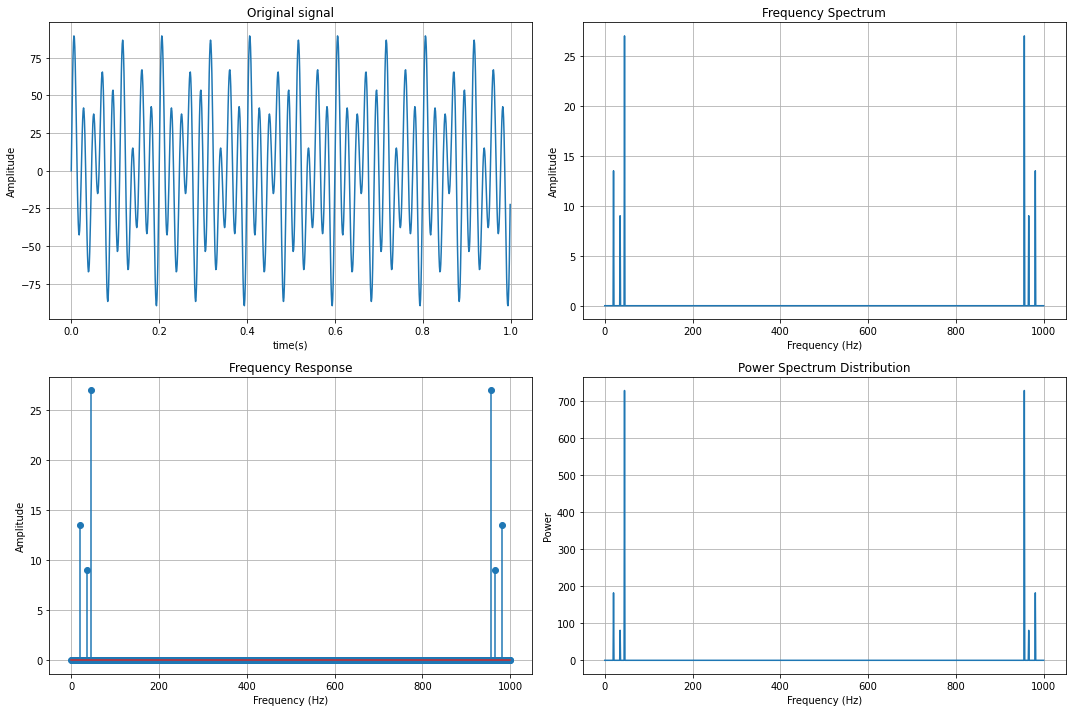

In [7]:
def dft_and_plot(in_signal, time_array=time,  A=None):
    """
    Apply discrete fourier transform to input function and then plot
    params:
        - in_signal: input signal
        - time_array:  a time vector of time interval
    """

    if A is not None:
        # filter signal (clipping)
        in_signal = np.clip(in_signal, -A, A)
    # DFT transform function
    def _dft(signal):
        N = len(signal)

        # complex part
        n = np.arange(N) # 1xN
        k = n.reshape((N, 1)) # Nx1
        e = np.exp(-2j * np.pi * k * n / N)
        
        output = np.dot(e, signal)
        
        return output


    # DFT process
    y_dft = _dft(in_signal)

    # frequency range
    freqs = [k / (time_array[-1] - time_array[0]) for k in range(len(y_dft))]

    # Compute magnitude spectrum
    magnitude = [abs(a) / len(t) for a in y_dft]


    # Find maximum observation range
    max_obs_range_index = np.argmax(magnitude)
    center_frequency = abs(freqs[max_obs_range_index])
    max_amplitude = magnitude[max_obs_range_index]

    # Print center frequency and corresponding amplitude
    print("Center Frequency:", center_frequency, "Hz")
    print("Corresponding Amplitude:", max_amplitude)
    
    ## PLOTTING
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # original signal
    axes[0, 0].plot(time_array, in_signal)
    axes[0, 0].set_title('Original signal')
    axes[0, 0].set_xlabel('time(s)')
    axes[0, 0].set_ylabel('Amplitude')
    axes[0, 0].grid(True)

    # full range spectrum
    axes[0, 1].plot(freqs, magnitude)
    axes[0, 1].set_title('Frequency Spectrum')
    axes[0, 1].set_xlabel('Frequency (Hz)')
    axes[0, 1].set_ylabel('Amplitude')
    axes[0, 1].grid(True)
    
    # Plot the frequency response
    axes[1, 0].stem(freqs, magnitude, use_line_collection=True)
    axes[1, 0].set_title('Frequency Response')
    axes[1, 0].set_xlabel('Frequency (Hz)')
    axes[1, 0].set_ylabel('Amplitude')
    axes[1, 0].grid(True)

    # Plot the power spectrum distribution
    power_spectrum = [a ** 2 for a in magnitude]
    axes[1, 1].plot(freqs, power_spectrum)
    axes[1, 1].set_title('Power Spectrum Distribution')
    axes[1, 1].set_xlabel('Frequency (Hz)')
    axes[1, 1].set_ylabel('Power')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()


# t = time
t = [i / 1000 for i in range(1000)]  # 1000 points from 0 to 1 second
# our signal: y= N\sin(2\pi20t) + 2/3N\sin(2\pi35t)+2N\sin(2\pi45t)
N = 27
y = [N * np.sin(2*np.pi * 20*t_step) + 2/3*N * np.sin(2*np.pi * 35*t_step) + 2*N * np.sin(2*np.pi * 45*t_step) for t_step in t]

dft_and_plot(y, t)

Center Frequency: 62685.0 Hz
Corresponding Amplitude: 0.6365698350187184


C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\39897199.py:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1, 0].stem(freqs, magnitude, use_line_collection=True)


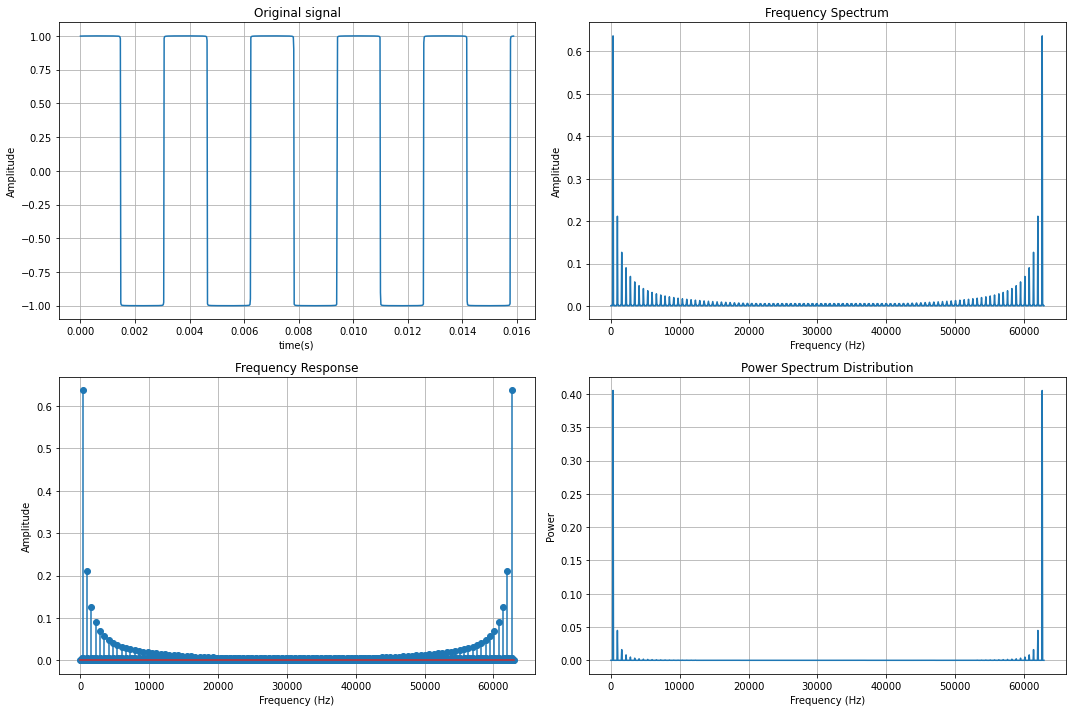

In [8]:
square_wave1000, _ = square_wave()
dft_and_plot(square_wave1000)

Center Frequency: 315.0 Hz
Corresponding Amplitude: 0.40505359433539656


C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\39897199.py:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1, 0].stem(freqs, magnitude, use_line_collection=True)


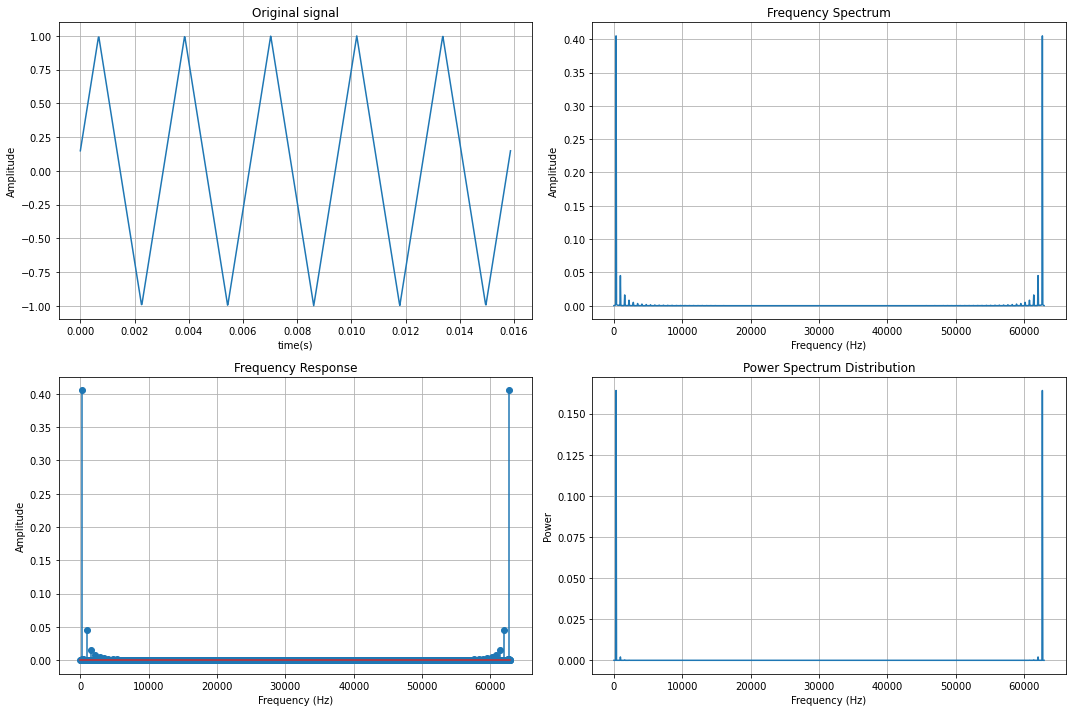

In [9]:
triangle_wave1000, _ = triangle_wave()
dft_and_plot(triangle_wave1000)

Center Frequency: 315.0 Hz
Corresponding Amplitude: 0.31796916328390645


C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\39897199.py:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1, 0].stem(freqs, magnitude, use_line_collection=True)


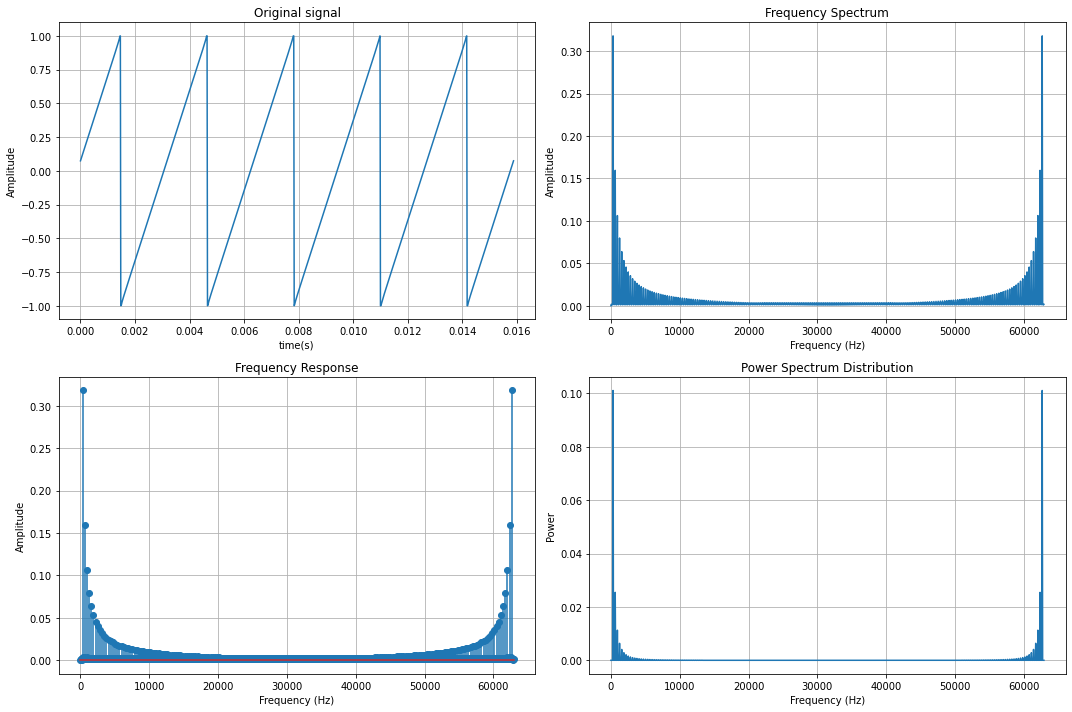

In [10]:
sawtooth_wave1000, _ = sawtooth_wave()
dft_and_plot(sawtooth_wave1000, A=1)

Center Frequency: 0.0 Hz
Corresponding Amplitude: 0.49949390793071713


C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\39897199.py:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1, 0].stem(freqs, magnitude, use_line_collection=True)


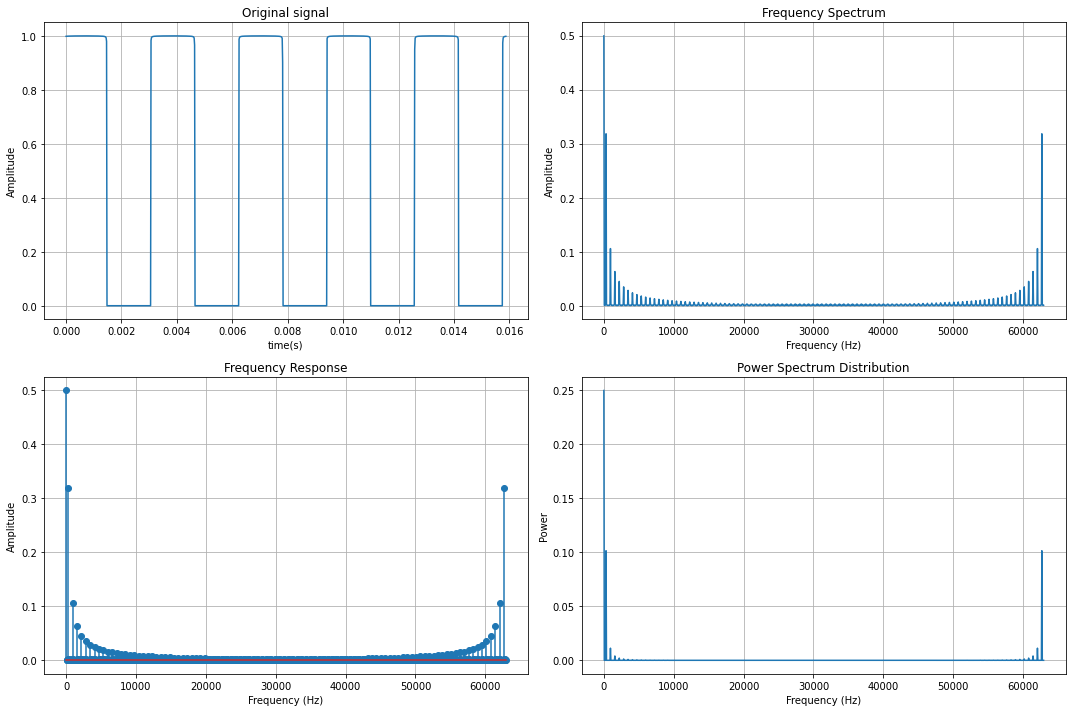

In [11]:
pulse_train1000, _ = pulse_train()
dft_and_plot(pulse_train1000)